<a href="https://colab.research.google.com/github/Priyansh4615/Learning-/blob/main/stock_market_analysis_with_supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM**

In [1]:
# Data collection
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL' , api_key = '0eae58d56c4ba11e7e57f50122d6216576f05a1a')

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df1 = pd.read_csv('AAPL.csv')

In [6]:
df1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-12-22 00:00:00+00:00,175.01,175.42,174.50,174.68,16052615,41.602321,41.699784,41.481087,41.523876,64210460,0.0,1.0
1,AAPL,2017-12-26 00:00:00+00:00,170.57,171.47,169.68,170.80,32968167,40.546871,40.760814,40.335306,40.601546,131872668,0.0,1.0
2,AAPL,2017-12-27 00:00:00+00:00,170.60,170.78,169.71,170.10,21672062,40.554003,40.596791,40.342437,40.435146,86688248,0.0,1.0
3,AAPL,2017-12-28 00:00:00+00:00,171.08,171.85,170.48,171.00,15997739,40.668105,40.851145,40.525477,40.649088,63990956,0.0,1.0
4,AAPL,2017-12-29 00:00:00+00:00,169.23,170.59,169.22,170.52,25643711,40.228335,40.551626,40.225957,40.534986,102574844,0.0,1.0


In [7]:
df1.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-12-14 00:00:00+00:00,143.21,146.655,141.160,145.350,82291182,143.21,146.655,141.160,145.350,82291182,0.0,1.0
1253,AAPL,2022-12-15 00:00:00+00:00,136.50,141.800,136.025,141.110,98931907,136.50,141.800,136.025,141.110,98931907,0.0,1.0
1254,AAPL,2022-12-16 00:00:00+00:00,134.51,137.650,133.730,136.685,160156900,134.51,137.650,133.730,136.685,160156900,0.0,1.0
1255,AAPL,2022-12-19 00:00:00+00:00,132.37,135.200,131.320,135.110,79592614,132.37,135.200,131.320,135.110,79592614,0.0,1.0
1256,AAPL,2022-12-20 00:00:00+00:00,132.30,133.250,129.890,131.390,77432819,132.30,133.250,129.890,131.390,77432819,0.0,1.0


In [8]:
df2 = df.reset_index()['close']

In [9]:
df2.shape

(1257,)

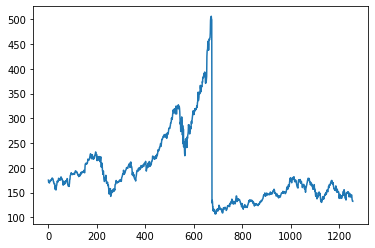

In [10]:
import matplotlib.pyplot as plt
plt.plot(df2)

**LSTM are so sensitive to the scale of the data . so we apply MinMax Scaler**

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
print(df2)

[[0.17074515]
 [0.1596243 ]
 [0.15969944]
 ...
 [0.06930495]
 [0.0639449 ]
 [0.06376957]]


**Splitting dataset into train and test data**

In [14]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df2[0:training_size,:], df2[training_size:len(df2),:1]

In [15]:
#convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], [];
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i +  time_step, 0 ])
  return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t , t+1 , t+3 and Y = t+4
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , y_test = create_dataset(test_data , time_step)

In [17]:
print(X_train)

[[0.17074515 0.1596243  0.15969944 ... 0.19937383 0.203732   0.20075141]
 [0.1596243  0.15969944 0.16090169 ... 0.203732   0.20075141 0.19904822]
 [0.15969944 0.16090169 0.156268   ... 0.20075141 0.19904822 0.20235441]
 ...
 [0.02053851 0.02056356 0.02444584 ... 0.04691296 0.04488416 0.03428929]
 [0.02056356 0.02444584 0.01092048 ... 0.04488416 0.03428929 0.03293676]
 [0.02444584 0.01092048 0.02123982 ... 0.03428929 0.03293676 0.04145272]]


In [18]:
print(X_train.shape) , print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape) , print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [20]:
# reshape input to be [samples , time steps , features] which is required for LSTM 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [21]:
#create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50 , return_sequences=True , input_shape =(100,1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train , y_train , validation_data = (X_test,y_test), epochs = 100 , batch_size = 64 , verbose = 1)

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.9.2'

In [27]:
### lets do the prediction and check the performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [28]:
## Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
## calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

231.11803195598688

In [30]:
### test data RMSE
math.sqrt(mean_squared_error(y_test , test_predict))

155.36212208985444

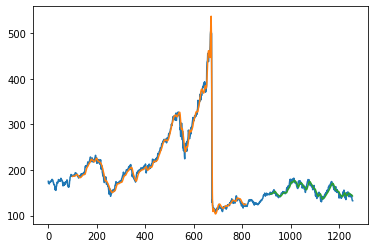

In [32]:
#### Plotting

# shift train predictions for plotting
look_back = 100 
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back: len(train_predict)+ look_back, :] = train_predict

# shift test predictions for plotting
testPredict_plot = numpy.empty_like(df2)
testPredict_plot[:, :] = numpy.nan
testPredict_plot[len(train_predict) + (look_back*2) + 1 : len(df2) - 1, :] = test_predict

#plot baseline and predictions 
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredict_plot)
plt.show()


In [34]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [36]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 99
i = 0;
while(i < 30):

  if(len(temp_input) > 99):
    #print(temp_input)
    x_input = np.array(temp_input[1:])
    print("{} day input {} ".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps , 1))
    #print(x_input)
    yhat = model.predict(x_input , verbose = 0)
    print("{} day output {} ".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i = i + 1

  else:
    x_input = x_input.reshape((1, n_steps , 1))
    yhat = model.predict(x_input , verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1

print(lst_output)

[0.0837525]
100
1 day input [0.14850344 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305
 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 0.15201002 0.15827176 0.14221666
 0.13660614 0.13041954 0.1261866  0.12804008 0.12265498 0.11944897
 0.12303068 0.11927364 0.1265623  0.14174076 0.11772073 0.12140263
 0.11403882 0.10985598 0.11932373 0.1253851  0.11742016 0.11496556
 0.10917971 0.11003131 0.11251096 0.10770194 0.08926738 0.07854728
 0.08919224 0.09833438 0.09908579 0.09665623 0.08328115 0.0841077
 0.08050094 0.07889793 0.09054477 0.07899812 0.08909205 0.09244834
 0.09272386 0.09154665 0.10126487 0.10672511 0.11396368 0.10647464
 0.09507827 0.12247965 0.11646838 0.10973075 0.09565435 0.08025047
 0.07899812 0.08035066 0.08180338 0.07020664 0.10026299 0.10735128
 0.10379461 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835
 0.10855354 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844
 0.10386976 0.10261741 0.09966187 0

In [40]:
day_new = np.arange(1,100)
day_pred = np.arange(100,131)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df2)

1257

In [43]:
df3 = df2.tolist()
df3.extend(lst_output)

ValueError: ignored

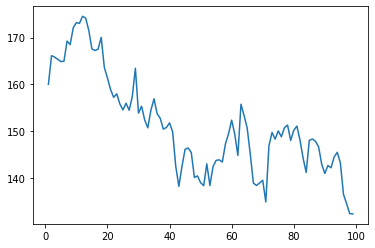

In [47]:
plt.plot(day_new, scaler.inverse_transform(df2[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))